## wavelet transform

### test data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100 
t = np.arange(0, 1, 1 / fs)
f1 = 50
f2 = 5
signal = 0.6 * np.sin(2 * np.pi * f1 * t) + 2 * np.cos(2 * np.pi * f2 * t + np.pi/2)

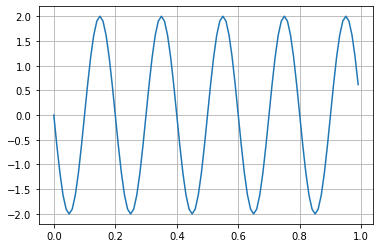

In [3]:
# visualizing signal
plt.plot(t, signal)
plt.grid()

In [6]:
import pywt

wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

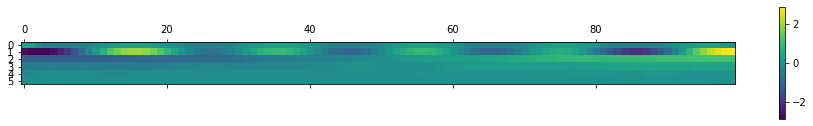

In [40]:
scales = np.asarray([1, 10, 50, 100, 200, 400])

coef, freqs=pywt.cwt(signal,scales,'mexh', sampling_period= 1)
plt.matshow(coef) # doctest: +SKIP
plt.colorbar()
plt.show()

# Arc signal wavelet transform

In [22]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환

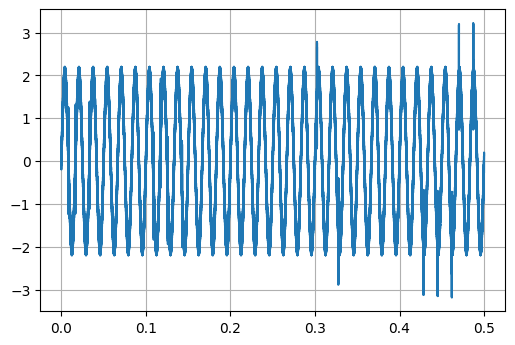

In [23]:
# visualizing signal (노말과 아크 상태를 추가하여 완성된 신호)

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

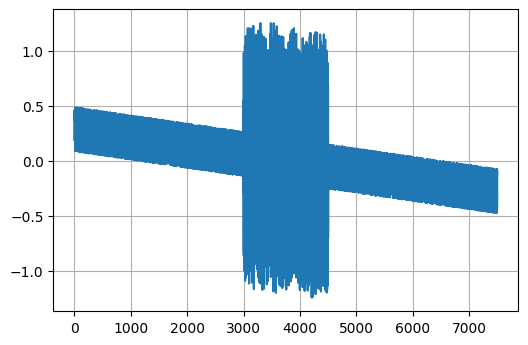

In [28]:
plt.figure(num = 1, dpi = 100)
plt.plot(sig[79500:87000])
plt.grid()

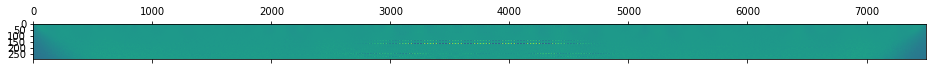

In [43]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

scales = np.arange(1, 300)
coef, freqs=pywt.cwt(sig[79500:87000], scales,'gaus1')
plt.matshow(coef) # doctest: +SKIP
plt.show()

# Verification

In [75]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
t = np.arange(0, 1, 1 / fs)
f1 = 30

np.random.seed(77)
no = np.random.uniform(100000, 500000, len(t))

signal = 2 * np.sin(2 * np.pi * f1 * t) + 0.2 * np.sin(2 * np.pi * no * t)

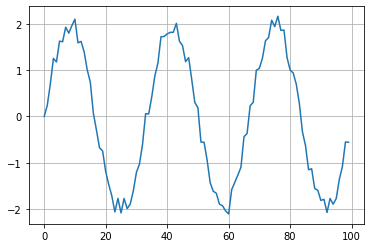

In [77]:
# visualizing signal
plt.plot(signal[:100])
plt.grid()

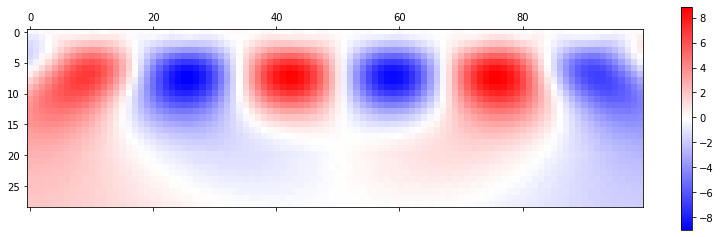

In [126]:
sig = signal[:100]

scales = np.arange(1, 30)

coef, freqs=pywt.cwt(sig, scales, 'mexh', sampling_period= 1)

cmap = plt.get_cmap('bwr')
plt.matshow(coef, cmap = cmap) # doctest: +SKIP
plt.colorbar()
plt.show()

In [127]:
coef.shape

(29, 100)

scale 1: 0.3405500590223095
scale 2: 1.0311021824030313
scale 3: 2.192538103167266
scale 4: 3.748915058554564
scale 5: 5.491320397781845
scale 6: 7.0773755059334835
scale 7: 8.255451707552256
scale 8: 8.863673233954286
scale 9: 8.892606265741854


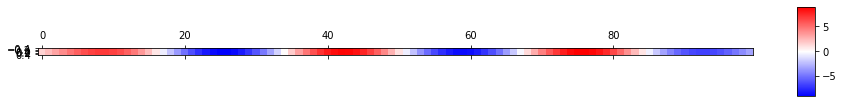

In [128]:
max_scale = 0

for i, n in enumerate(scales):
    if max_scale < coef[i].max():
        max_scale = coef[i].max()
        scale_size = n
        print("scale {}:".format(n), coef[i].max())
        
coef, freqs=pywt.cwt(sig, scale_size, 'mexh', sampling_period= 1)

cmap = plt.get_cmap('bwr')
plt.matshow(coef, cmap=cmap) # doctest: +SKIP
plt.colorbar(shrink=0.8, aspect=5)
plt.show()

In [134]:
def wavelet(sig, scale):
    max_scale = 0
    coef, freqs=pywt.cwt(sig, scales, 'mexh', sampling_period= 1)
    
    for i, n in enumerate(scales):
        if max_scale < coef[i].max():
            max_scale = coef[i].max()
            scale_size = n
            print("scale {}:".format(n), coef[i].max())
            
    coef, freqs=pywt.cwt(sig, scale_size, 'mexh', sampling_period= 1)
            
    cmap = plt.get_cmap('bwr')
    plt.matshow(coef, cmap=cmap)
    plt.colorbar(shrink=0.8, aspect=5)
    plt.show()

scale 1: 0.3405500590223095
scale 2: 1.0311021824030313
scale 3: 2.192538103167266
scale 4: 3.748915058554564
scale 5: 5.491320397781845
scale 6: 7.0773755059334835
scale 7: 8.255451707552256
scale 8: 8.863673233954286
scale 9: 8.892606265741854


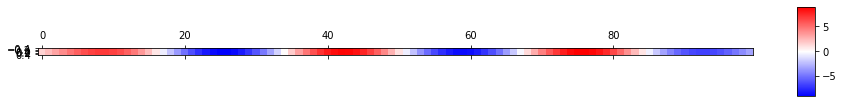

In [136]:
scales = np.arange(1, 30)

wavelet(sig, scales)

# Arc signal Verification

In [137]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환
sig = sig[79500:87000]

scale 700: 5.351084129266787
scale 701: 5.599764457798368
scale 706: 5.644492843017013
scale 707: 5.704297458284699
scale 719: 5.800059797872294
scale 726: 5.880664508008493
scale 727: 5.984145539616566
scale 730: 6.050195559348839
scale 737: 6.151324479732578
scale 744: 6.243412771584833
scale 745: 6.937773601273065
scale 746: 14.912204141511332
scale 799: 21.714296700198965
scale 959: 28.191123920241857


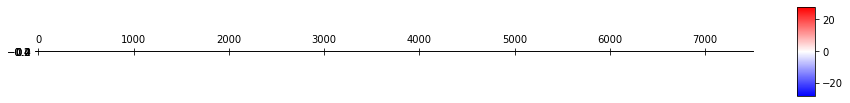

In [144]:
scales = np.arange(700, 1000)

wavelet(sig, scales)

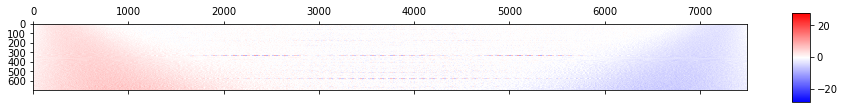

In [160]:
# scale_size = np.asarray([80, 159, 319, 640, 799, 959])
scale_size = np.arange(300, 1000)
coef, freqs=pywt.cwt(sig, scale_size, 'mexh', sampling_period= 1)
cmap = plt.get_cmap('bwr')
plt.matshow(coef, cmap=cmap)
plt.colorbar(shrink=0.8, aspect=5)
plt.show()